Run: 1, Generation: 1, Best Fitness: 122.00593468866222
Run: 1, Generation: 2, Best Fitness: 114.63968805389976
Run: 1, Generation: 3, Best Fitness: 99.88549135495384
Run: 1, Generation: 4, Best Fitness: 99.88549135495384
Run: 1, Generation: 5, Best Fitness: 91.44931201956504
Run: 1, Generation: 6, Best Fitness: 91.44931201956504
Run: 1, Generation: 7, Best Fitness: 91.44931201956504
Run: 1, Generation: 8, Best Fitness: 91.44931201956504
Run: 1, Generation: 9, Best Fitness: 91.44931201956504
Run: 1, Generation: 10, Best Fitness: 91.44931201956504
Run: 1, Generation: 11, Best Fitness: 91.44931201956504
Run: 1, Generation: 12, Best Fitness: 85.66524432088609
Run: 1, Generation: 13, Best Fitness: 85.66524432088609
Run: 1, Generation: 14, Best Fitness: 85.66524432088609
Run: 1, Generation: 15, Best Fitness: 85.66524432088609
Run: 1, Generation: 16, Best Fitness: 85.66524432088609
Run: 1, Generation: 17, Best Fitness: 85.66524432088609
Run: 1, Generation: 18, Best Fitness: 79.67902475891503

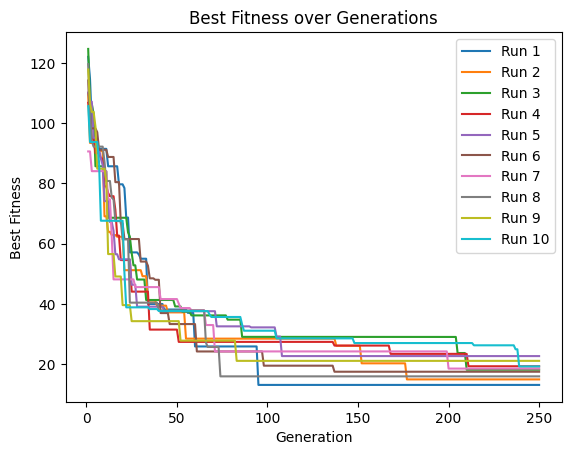

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Entry, Button
from functools import partial

class DifferentialEvolution:
    def __init__(self, pop_size=1000, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=1000):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        population = np.zeros((self.pop_size, self.dimensions))
        for i in range(self.dimensions):
            population[:, i] = np.random.uniform(i / self.dimensions, (i + 1) / self.dimensions, self.pop_size)
        population = self.min_val + population * (self.max_val - self.min_val)
        return population

    def mutation(self, population):
        indices = np.random.choice(len(population), size=3, replace=False)
        mutant_vector = population[indices[0]] + 0.5 * (population[indices[1]] - population[indices[2]])
        return np.clip(mutant_vector, self.min_val, self.max_val)

    def crossover(self, target_vector, mutant_vector):
        crossover_mask = np.random.rand(self.dimensions) < 0.9
        return np.where(crossover_mask, mutant_vector, target_vector)

    def evolve(self, num_runs):
        overall_best_solution = None
        overall_best_fitness = float('inf')
        best_fitnesses = []
        generation_fitnesses = []

        for run in range(num_runs):
            population = self.initialize_population()
            best_solution = None
            best_fitness = float('inf')
            generation_fitness = []

            for generation in range(self.num_generations):
                for target_idx, target_vector in enumerate(population):
                    mutant_vector = self.mutation(population)
                    trial_vector = self.crossover(target_vector, mutant_vector)
                    trial_fitness = self.rastrigin(trial_vector)
                    target_fitness = self.rastrigin(target_vector)

                    if trial_fitness < target_fitness:
                        population[target_idx] = trial_vector
                        if trial_fitness < best_fitness:
                            best_fitness = trial_fitness
                            best_solution = trial_vector

                if best_fitness < overall_best_fitness:
                    overall_best_fitness = best_fitness
                    overall_best_solution = best_solution

                best_fitnesses.append(best_fitness)
                generation_fitness.append(best_fitness)
                print(f"Run: {run + 1}, Generation: {generation + 1}, Best Fitness: {best_fitness}")

            generation_fitnesses.append(generation_fitness)

        print("Overall Best Solution:", overall_best_solution)
        print("Overall Best Fitness:", overall_best_fitness)

        # Plotting the fitness values for each generation
        plt.figure()
        for i, fitnesses in enumerate(generation_fitnesses):
            plt.plot(range(1, self.num_generations + 1), fitnesses, label=f"Run {i + 1}")
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.title('Best Fitness over Generations')
        plt.legend()
        plt.show()

class DifferentialEvolutionGUI:
    def __init__(self, master):
        self.master = master
        master.title("Differential Evolution")

        self.pop_size_label = Label(master, text="Population Size:")
        self.pop_size_label.grid(row=0, column=0)
        self.pop_size_entry = Entry(master)
        self.pop_size_entry.grid(row=0, column=1)

        self.dimensions_label = Label(master, text="Dimensions:")
        self.dimensions_label.grid(row=1, column=0)
        self.dimensions_entry = Entry(master)
        self.dimensions_entry.grid(row=1, column=1)

        self.min_val_label = Label(master, text="Minimum Value:")
        self.min_val_label.grid(row=2, column=0)
        self.min_val_entry = Entry(master)
        self.min_val_entry.grid(row=2, column=1)

        self.max_val_label = Label(master, text="Maximum Value:")
        self.max_val_label.grid(row=3, column=0)
        self.max_val_entry = Entry(master)
        self.max_val_entry.grid(row=3, column=1)

        self.num_generations_label = Label(master, text="Number of Generations:")
        self.num_generations_label.grid(row=4, column=0)
        self.num_generations_entry = Entry(master)
        self.num_generations_entry.grid(row=4, column=1)

        self.num_runs_label = Label(master, text="Number of Runs:")
        self.num_runs_label.grid(row=5, column=0)
        self.num_runs_entry = Entry(master)
        self.num_runs_entry.grid(row=5, column=1)

        self.run_button = Button(master, text="Run Differential Evolution", command=self.run_algorithm)
        self.run_button.grid(row=6, columnspan=2)

    def run_algorithm(self):
        pop_size = int(self.pop_size_entry.get())
        dimensions = int(self.dimensions_entry.get())
        min_val = float(self.min_val_entry.get())
        max_val = float(self.max_val_entry.get())
        num_generations = int(self.num_generations_entry.get())
        num_runs = int(self.num_runs_entry.get())

        de = DifferentialEvolution(pop_size=pop_size, dimensions=dimensions, min_val=min_val, max_val=max_val, num_generations=num_generations)
        de.evolve(num_runs)

if __name__ == "__main__":
    root = Tk()
    app = DifferentialEvolutionGUI(root)
    root.mainloop()
